In [1]:
# Set seeds for reproducibility
import random
random.seed(0)

import numpy as np
np.random.seed(0)

import tensorflow as tf
tf.random.set_seed(0)

In [2]:
import os
import json
from zipfile import ZipFile
from PIL import Image

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models


In [3]:
!pip install kaggle


In [4]:
kaggle_credentails = json.load(open("kaggle.json"))


In [5]:

# setup Kaggle API key as environment variables
os.environ['KAGGLE_USERNAME'] = kaggle_credentails["username"]
os.environ['KAGGLE_KEY'] = kaggle_credentails["key"]

In [6]:
!kaggle datasets download -d shashwatwork/identifying-disease-in-tea-leafs

100% 739M/740M [00:22<00:00, 28.0MB/s]
100% 740M/740M [00:22<00:00, 34.5MB/s]


In [7]:
!ls

identifying-disease-in-tea-leafs.zip  kaggle.json  sample_data


In [9]:

# Unzip the downloaded dataset
with ZipFile("identifying-disease-in-tea-leafs.zip", 'r') as zip_ref:
    zip_ref.extractall()


In [10]:
!ls

 identifying-disease-in-tea-leafs.zip   kaggle.json   sample_data  'tea sickness dataset'


In [12]:
print(os.listdir("tea sickness dataset"))


print(len(os.listdir("tea sickness dataset/Anthracnose")))
print(os.listdir("tea sickness dataset/Anthracnose")[:5])

print(len(os.listdir("tea sickness dataset/algal leaf")))
print(os.listdir("tea sickness dataset/algal leaf")[:5])

print(len(os.listdir("tea sickness dataset/bird eye spot")))
print(os.listdir("tea sickness dataset/bird eye spot")[:5])

print(len(os.listdir("tea sickness dataset/brown blight")))
print(os.listdir("tea sickness dataset/brown blight")[:5])

print(len(os.listdir("tea sickness dataset/gray light")))
print(os.listdir("tea sickness dataset/gray light")[:5])

print(len(os.listdir("tea sickness dataset/healthy")))
print(os.listdir("tea sickness dataset/healthy")[:5])

print(len(os.listdir("tea sickness dataset/red leaf spot")))
print(os.listdir("tea sickness dataset/red leaf spot")[:5])

print(len(os.listdir("tea sickness dataset/white spot")))
print(os.listdir("tea sickness dataset/white spot")[:5])

['red leaf spot', 'Anthracnose', 'algal leaf', 'white spot', 'healthy', 'gray light', 'bird eye spot', 'brown blight']
100
['IMG_20220503_145512.jpg', 'IMG_20220503_143659.jpg', 'IMG_20220503_144141.jpg', 'IMG_20220503_145827.jpg', 'IMG_20220503_145559.jpg']
113
['UNADJUSTEDNONRAW_thumb_52.jpg', 'UNADJUSTEDNONRAW_thumb_46.jpg', 'UNADJUSTEDNONRAW_thumb_2.jpg', 'UNADJUSTEDNONRAW_thumb_62.jpg', 'UNADJUSTEDNONRAW_thumb_53.jpg']
100
['IMG_20220503_154620.jpg', 'IMG_20220503_155153.jpg', 'IMG_20220503_154347.jpg', 'IMG_20220503_154813.jpg', 'IMG_20220503_154217.jpg']
113
['UNADJUSTEDNONRAW_thumb_151.jpg', 'UNADJUSTEDNONRAW_thumb_128.jpg', 'UNADJUSTEDNONRAW_thumb_14b.jpg', 'UNADJUSTEDNONRAW_thumb_11f.jpg', 'UNADJUSTEDNONRAW_thumb_102.jpg']
100
['IMG_20220503_141106.jpg', 'IMG_20220503_141642.jpg', 'IMG_20220503_141414.jpg', 'IMG_20220503_141320.jpg', 'IMG_20220503_142115.jpg']
74
['UNADJUSTEDNONRAW_thumb_237.jpg', 'UNADJUSTEDNONRAW_thumb_20b.jpg', 'UNADJUSTEDNONRAW_thumb_23b.jpg', 'UNADJUSTED

In [13]:
# Dataset Path
base_dir = 'tea sickness dataset/Anthracnose'


(4160, 3120, 3)


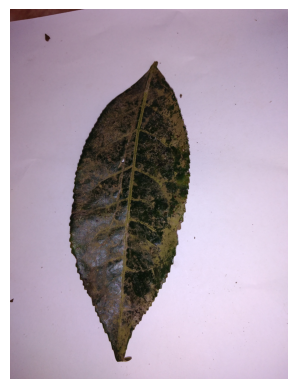

In [14]:
image_path = '/content/tea sickness dataset/Anthracnose/IMG_20220503_143433.jpg'

# Read the image
img = mpimg.imread(image_path)

print(img.shape)
# Display the image
plt.imshow(img)
plt.axis('off')  # Turn off axis numbers
plt.show()

In [15]:
image_path = '/content/tea sickness dataset/Anthracnose/IMG_20220503_143433.jpg'

# Read the image
img = mpimg.imread(image_path)

print(img)

[[[ 86  35  32]
  [ 87  36  33]
  [ 88  37  34]
  ...
  [168 144 168]
  [165 141 167]
  [163 139 165]]

 [[ 82  31  28]
  [ 84  33  30]
  [ 87  36  33]
  ...
  [167 143 167]
  [165 141 167]
  [163 139 165]]

 [[ 81  32  28]
  [ 84  35  31]
  [ 87  38  34]
  ...
  [166 142 166]
  [165 141 167]
  [163 139 165]]

 ...

 [[139 117 130]
  [135 113 126]
  [142 120 133]
  ...
  [199 181 207]
  [199 181 207]
  [199 181 207]]

 [[138 116 129]
  [135 113 126]
  [142 120 133]
  ...
  [200 182 208]
  [199 181 207]
  [199 181 207]]

 [[140 118 131]
  [140 118 131]
  [146 124 137]
  ...
  [200 182 208]
  [199 181 207]
  [198 180 206]]]


In [16]:
# Image Parameters
img_size = 224
batch_size = 32

In [17]:
# Image Data Generators
data_gen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2  # Use 20% of data for validation
)


In [35]:
train_generator = data_gen.flow_from_directory(
    '/content/tea sickness dataset',
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode='categorical',
    classes=['Anthracnose','algal leaf','bird eye spot','brown blight','gray light','healthy','red leaf spot','white spot']
)


Found 885 images belonging to 8 classes.


In [36]:
validation_generator = data_gen.flow_from_directory(
    '/content/tea sickness dataset',
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation',
    classes=['Anthracnose','algal leaf','bird eye spot','brown blight','gray light','healthy','red leaf spot','white spot']
)

Found 174 images belonging to 8 classes.


In [37]:
# Model Definition
model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_size, img_size, 3)))
model.add(layers.MaxPooling2D(2, 2))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(2, 2))


model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(train_generator.num_classes, activation='softmax'))


In [38]:

# model summary
model.summary()



Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 111, 111, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_9 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 54, 54, 64)        0         
 g2D)                                                            
                                                                 
 flatten_3 (Flatten)         (None, 186624)            0         
                                                                 
 dense_5 (Dense)             (None, 256)              

In [39]:
# Compile the Model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [41]:
# Define the number of classes
num_classes = 8  # Assuming 7 classes in your dataset

# Model definition
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_size, img_size, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(num_classes, activation='softmax')
])


In [44]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [45]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=5,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size
)


Epoch 1/5
27/27 [==============================] - 55s 1s/step - loss: 1.6303 - accuracy: 0.3843 - val_loss: 1.0557 - val_accuracy: 0.4812
Epoch 2/5
27/27 [==============================] - 40s 1s/step - loss: 1.0604 - accuracy: 0.5475 - val_loss: 1.1657 - val_accuracy: 0.4688
Epoch 3/5
27/27 [==============================] - 41s 2s/step - loss: 0.8848 - accuracy: 0.6260 - val_loss: 0.8132 - val_accuracy: 0.6562
Epoch 4/5
27/27 [==============================] - 34s 1s/step - loss: 0.6719 - accuracy: 0.7442 - val_loss: 0.6815 - val_accuracy: 0.7063
Epoch 5/5
27/27 [==============================] - 39s 1s/step - loss: 0.5297 - accuracy: 0.8089 - val_loss: 0.4430 - val_accuracy: 0.8375


In [46]:
loss, accuracy = model.evaluate(validation_generator, steps=validation_generator.samples // batch_size)
print('Validation accuracy:', accuracy)


5/5 [==============================] - 6s 1s/step - loss: 0.4719 - accuracy: 0.8250
Validation accuracy: 0.824999988079071


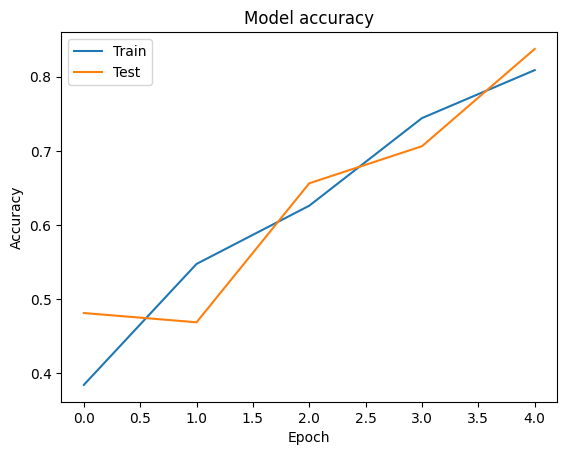

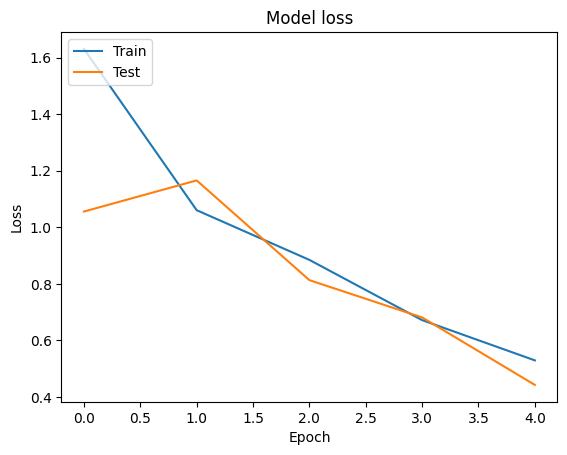

In [47]:

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [48]:
# Function to Load and Preprocess the Image using Pillow
def load_and_preprocess_image(image_path, target_size=(224, 224)):
    # Load the image
    img = Image.open(image_path)
    # Resize the image
    img = img.resize(target_size)
    # Convert the image to a numpy array
    img_array = np.array(img)
    # Add batch dimension
    img_array = np.expand_dims(img_array, axis=0)
    # Scale the image values to [0, 1]
    img_array = img_array.astype('float32') / 255.
    return img_array

# Function to Predict the Class of an Image
def predict_image_class(model, image_path, class_indices):
    preprocessed_img = load_and_preprocess_image(image_path)
    predictions = model.predict(preprocessed_img)
    predicted_class_index = np.argmax(predictions, axis=1)[0]
    predicted_class_name = class_indices[predicted_class_index]
    return predicted_class_name

In [49]:
# Create a mapping from class indices to class names
class_indices = {v: k for k, v in train_generator.class_indices.items()}

In [50]:
class_indices

{0: 'Anthracnose',
 1: 'algal leaf',
 2: 'bird eye spot',
 3: 'brown blight',
 4: 'gray light',
 5: 'healthy',
 6: 'red leaf spot',
 7: 'white spot'}

In [51]:
# saving the class names as json file
json.dump(class_indices, open('class_indices.json', 'w'))

In [52]:
# Example Usage
image_path = '/content/tea sickness dataset/healthy/UNADJUSTEDNONRAW_thumb_207.jpg'

predicted_class_name = predict_image_class(model, image_path, class_indices)

# Output the result
print("Predicted Class Name:", predicted_class_name)

1/1 [==============================] - 0s 318ms/step
Predicted Class Name: healthy


In [53]:
model.save('model.h5')


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
